#### Disciplina: Aprendizagem de Máquina
#### Período: 2022.1
#### Professor: César Lincoln Cavalcante Mattos
#### Aluno: Ítalo Cavalcante de Abreu - 542406

# Lista 1 - Regressão linear, polinomial e regularização


Instruções
- Com exceção dos casos explicitamente indicados, os algoritmos e modelos devem
ser implementados do início em qualquer linguagem de programação (Python,
R, Octave...).
- Pacotes auxiliares (sklearn, matplotlib, etc) podem ser usados somente para
facilitar a manipulação dos dados e criar grácos.
- A entrega da solução pode ser feita via pdf ou Jupyter notebook pelo SIGAA

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Questão 1

### Considere o conjunto de dados disponível em articial1d.csv organizado em duas colunas, x e y. Seja um modelo de regressão linear para yˆ = f(x).

In [270]:
dataset = np.genfromtxt('./artificial1d.csv', delimiter=',', skip_header=1)
dataset

array([[-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,  1.42295695],
       [ 1.        ,

In [275]:
x = dataset[:,0];
y = dataset[:,1];
X = np.array([np.full(x.size, 1),x]).T


    a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.

In [276]:

# y = X*w
def OLS(X,y):
    
    if(X.ndim <2):
        y_ = y.mean()
        x_ = X.mean()
        
        w1 = np.sum((y-y_)*(X-x_))/np.sum((X-x_)**2)
        w0 = y_- w1*x_
        
        return (w0,w1)
    else:
        XTX = np.dot(X.T,X)
        w = np.dot(np.dot(np.linalg.inv(XTX),X.T), y)
        # ou w = np.dot(np.linalg.pinv(X), y)
        return(w)

In [277]:
w = OLS(X, y)

y_pred = w[0] + w[1]*y
# Parametros encontrados
print('[w0 w1]: ', w)

# MSE
print('MSE: ', (1/(2*x.size))* np.sum( ( y - y_pred )**2 )   )

[w0 w1]:  [0.08956111 1.51328267]
MSE:  0.14097007560796895


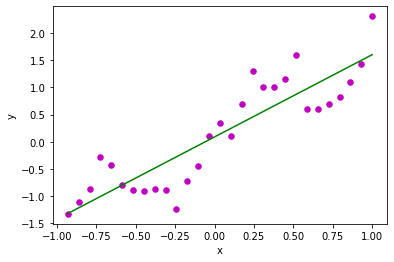

In [278]:
def plot2d(x, y, w):
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    y_pred = w[0] + w[1]*x
 
    plt.plot(x, y_pred, color = "g")
 
    plt.xlabel('x')
    plt.ylabel('y')
 
    plt.show()
    
plot2d(x,y,w)

    b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

In [279]:

def GD(X,y, alpha=0.01, epochs=100):
    N = X.shape[1]
    
    #Escolha um valor α positivo e pequeno.
    
    # Inicialize os parametros do modelo na iteracao t = 0.
    w = np.array(np.full(X.shape[1], 1))
    w[0] = 0
    t=0
    
    # Repita por diversos ciclos ( ́epocas):
    stop_condition = False
    while not stop_condition:
        t=t+1
        
        w_t=w.copy()
        
        # Calcule os erros do modelo
        y_t = np.dot(X, w_t)
        err_t = y - y_t
        
        # Atualize os parametros
        w = w_t + alpha*(1/N)*np.dot(err_t,X)
        
        
        #print(err_t, '\n\n\n', X, '\n\n\n', np.dot(err_t,X), '\n\n\n', w)
        
        if t>=epochs:
            stop_condition = True
        
    print('error :',err_t)
    return w
    
    
        
    
w2 = GD(X,y, 0.001, 10000)
w2

error : [-0.007623    0.10939519  0.23668283  0.72123731  0.47074742  0.0027816
 -0.19289676 -0.3110928  -0.377401   -0.5079735  -0.96023728 -0.54821858
 -0.38503749  0.06152056  0.20722645 -0.14862962  0.34972617  0.85567589
  0.44257519  0.33961743  0.38117209  0.71991254 -0.36756776 -0.48660594
 -0.48237917 -0.46642841 -0.28765074 -0.07552251  0.7069939 ]


array([0.08956111, 1.51328267])

In [280]:
w2 = GD(X,y, 0.001, 10000)

y_pred2 = w2[0] + w2[1]*y
# Parametros encontrados
print('[w0 w1]: ', w2)

# MSE
print('MSE: ', (1/(2*x.size))* np.sum( ( y - y_pred2 )**2 )   )

error : [-0.007623    0.10939519  0.23668283  0.72123731  0.47074742  0.0027816
 -0.19289676 -0.3110928  -0.377401   -0.5079735  -0.96023728 -0.54821858
 -0.38503749  0.06152056  0.20722645 -0.14862962  0.34972617  0.85567589
  0.44257519  0.33961743  0.38117209  0.71991254 -0.36756776 -0.48660594
 -0.48237917 -0.46642841 -0.28765074 -0.07552251  0.7069939 ]
[w0 w1]:  [0.08956111 1.51328267]
MSE:  0.140970075607957


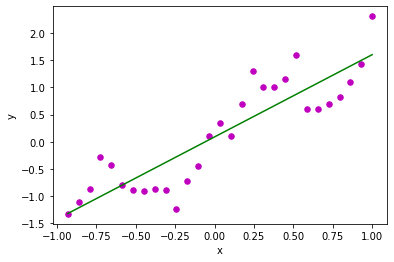

In [281]:
plot2d(x,y,w2)

    c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.


In [282]:
def SGD(X,y, alpha=0.01, epochs=100):
    N = X.shape[1]
    
    #Escolha um valor α positivo e pequeno.
    
    # Inicialize os parametros do modelo na iteracao t = 0.
    w = np.array(np.full(X.shape[1], 1))
    w[0] = 0
    t=0
    
    # Repita por diversos ciclos ( ́epocas):
    stop_condition = False
    while not stop_condition:
        
        t=t+1
        
        # Permute aleatoriamente a ordem dos dados
        # X_p = numpy.random.permutation(X).copy()
        assert X.shape[0] == y.size
        p = np.random.permutation(X.shape[0])
        X_p, y_p = X[p,:], y[p]

        
        # Para cada padr ̃ao de entrada, i = 1, . . . , N , repita:
        for i in range(0, N-1):

            w_t=w.copy()

            # Calcule os erros do modelo
            y_i_t = np.dot(X_p[i,:], w_t)
            err_t = y_p[i] - y_i_t

            # Atualize os parametros
            w = w_t + alpha*np.dot(err_t,X_p[i,:])


            #print(err_t, ' ', i, '\n\n\n', X_p, '\n\n\n', np.dot(err_t,X_p), '\n\n\n', w)
        
        if t>=epochs:
            stop_condition = True
        
    print('error :',err_t)
    return w

In [283]:
w3 = SGD(X,y, 0.001, 10000)

y_pred3 = w3[0] + w3[1]*y
# Parametros encontrados
print('[w0 w1]: ', w3)

# MSE
print('MSE: ', (1/(2*x.size))* np.sum( ( y - y_pred3 )**2 )   )

error : 0.45838192140308265
[w0 w1]:  [0.09147236 1.49632622]
MSE:  0.13258614969415342


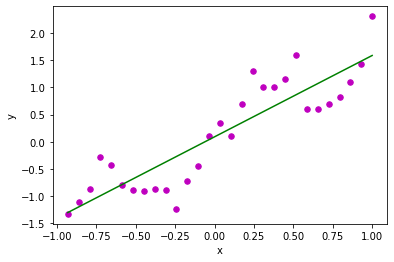

In [284]:
plot2d(x,y,w3)

## Questão 2
### Considere o conjunto de dados disponível em california.csv, organizado em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída. Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset.


In [358]:
california_dataset = np.genfromtxt('./california.csv', delimiter=',', skip_header=1)
print(california_dataset[0,:], '\n', california_dataset.shape)

[   2.8194       24.            4.7625        1.02083333  608.
    2.53333333   36.75       -119.85          0.811     ] 
 (4999, 9)


    a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%)

In [352]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(california_dataset, test_size=0.2, random_state=542406)

In [357]:
x_train = dataset_train[:,:8]
y_train = dataset_train[:,8]

#np.array([np.full(x.shape[0], 1), x[:,0], x[:,1], x[:,2], x[:,3], x[:,4], x[:,5], x[:,6], x[:,7]]).T

X_train = np.insert(x_train,0, np.full(x_train.shape[0], 1), axis=1)


x_test = dataset_test[:,:8]
y_test = dataset_test[:,8]

X_test = np.insert(x_test,0, np.full(x_test.shape[0], 1), axis=1)

print('training dataset: ', X_train, '\n', X_train.shape, '\n\n\n', 'testing dataset: ', X_test, X_test.shape, '\n')

training dataset:  [[   1.            3.65         10.         ...    3.54751943
    37.82       -121.28      ]
 [   1.            3.3929       39.         ...    3.46610169
    33.79       -118.27      ]
 [   1.            3.2622       33.         ...    2.83797217
    34.02       -118.09      ]
 ...
 [   1.            6.155        32.         ...    3.02325581
    34.25       -118.5       ]
 [   1.            2.02         22.         ...    3.16356877
    38.95       -119.95      ]
 [   1.            7.2758       52.         ...    2.65550239
    32.74       -117.22      ]] 
 (3999, 9) 


 testing dataset:  [[   1.            3.           50.         ...    3.
    33.98       -118.04      ]
 [   1.            3.6512       18.         ...    3.01097179
    34.04       -118.09      ]
 [   1.            3.2015       42.         ...    2.36462882
    34.16       -118.35      ]
 ...
 [   1.            2.5743        9.         ...    2.16103896
    34.59       -120.14      ]
 [   1.       